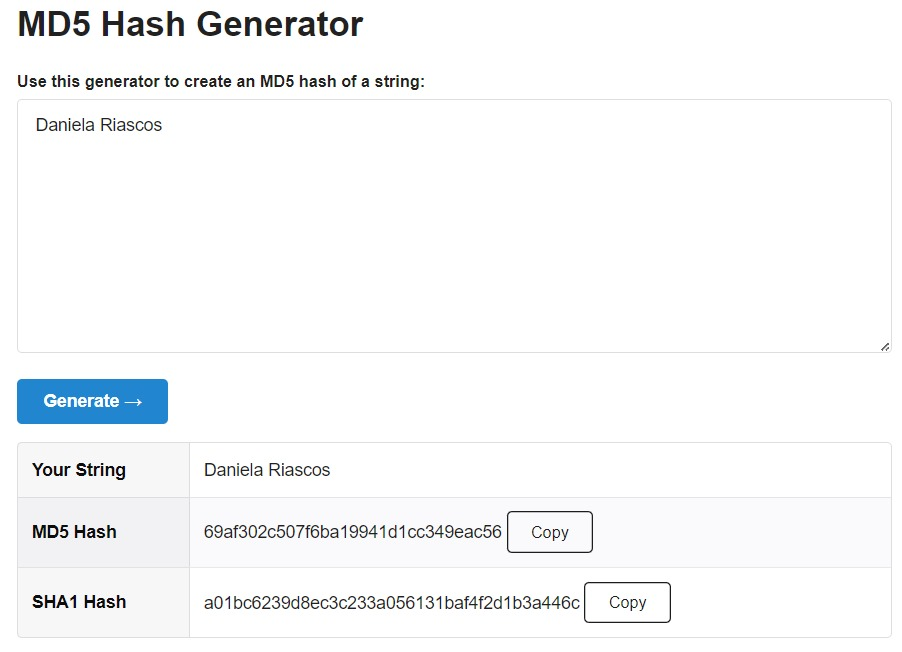

In [11]:
from IPython.display import display, Image
from PIL import Image as PILImage

ruta_imagen = 'hash.jpg'  
display(Image(filename=ruta_imagen))

In [6]:
s = 6

## Code challenge one
Having a list of n numbers with digits in range [0, S], where n <= 100, switch all list positions in O(n) time.
If the input number contains a digit greater or equal than S, you will delete the digit from the
number, for example with S=6, 61 becomes 1, and 6 will be deleted from the array. The result
should be printed in console/terminal. Please, don’t use built-in sort of your language.
Examples with S=6:
- [1, 2, 3, 4, 5, 6] -> [5, 4, 3, 2, 1] 
- [10, 20, 30, 40] -> [40, 30, 20, 10]
- [6] -> []
- [66] -> []
- [65] -> [5]
- [6, 2, 1] -> [1 , 2]
- [60, 6, 5, 4, 3, 2, 7, 7, 29, 1] -> [1, 2, 2, 3, 4, 5, 0]

In [9]:
MAX_LIST_LENGTH = 100
HALF_DIVISOR = 2
LAST_INDEX = 1

def reverseSort(listSort):
    n = len(listSort)
    for i in range(n // HALF_DIVISOR):
        listSort[i], listSort[n - LAST_INDEX - i] = listSort[n - LAST_INDEX - i], listSort[i]
    return listSort
     
def filterElements(listN,s):
    filteredList = [ #convierto cada numero de la lista n en cadena para iterar sobre los digitos que lo componen, ej 643, lista de comprension 4,3 , de los cuales losune conjoin 
        int(''.join([digit for digit in str(num) if int(digit) < s])) 
        for num in listN
        if any(int(digit) < s for digit in str(num))#para evitar procesar una cadena y genera una excepcion
    ]
    return reverseSort(filteredList)

def processList(listInput, s):
    if (len(listInput) > MAX_LIST_LENGTH) or not bool(listInput) :
        raise ValueError(f"The list must have a length between 1 and {MAX_LIST_LENGTH}.")
    return filterElements(listInput, s)

try:
    listInput = [66]
    result = processList(listInput, s)
    print(result)
except ValueError as e:
    print(e)

[]


## Code challenge two
Write a function that takes in a non-empty array of integers sorted in ascending order and returns a
new array of the same length with the squares of the original integers also sorted in ascending
order. If the output number is out of the range [0, SS] (for S=6 the range will be [0, 66]), you will
delete it of the output array. Please, don’t use built-in sort of your language.
- {"array": [1, 2, 3, 5, 6, 8, 9]} -> [1, 4, 9, 25, 36, 64]
- {"array": [-2, -1]} -> [1, 4]
- {"array": [-6, -5, 0, 5, 6]} -> [0, 25, 25, 36, 36]
- {"array": [-10, 10]} -> []

In [15]:
UPPER_LIMIT = int(str(s)+str(s))
SQUARE_EXPONENT = 2

def bubbleSort(list):
    n = len(list)
    for i in range(n):
        for j in range(0, n- i- 1):
            if list[j] > list[j + 1]:
                list[j], list[j + 1] = list[j + 1], list[j]
    return list

def squaresElements(arrayInt):
     squareList = [element**SQUARE_EXPONENT for element in arrayInt if element**SQUARE_EXPONENT <= UPPER_LIMIT]
     return bubbleSort(squareList) 

def processArray(listInput):
    if not bool(listInput) :
        raise ValueError("The list must have a one element.")
    return squaresElements(listInput)

try:
    arrInput=[1, 2, 3, 5, 6, 8, 9]
    result = processList(arrInput)
    print(result)
except ValueError as e:
    print(e)


[1, 4, 9, 25, 36, 64]


## Code challenge three 
Given an array of positive integers representing the values of coins in your possession, write a function that returns the minimum amount of change (the minimum sum of money) that you CANNOT give change. The given coins can have any positive integer value and aren't necessarily unique (i.e., you can have multiple coins of the same value). You can use built-in sort of your language.
Hint 1
One approach to solve this problem is to attempt to create every single amount of change, starting at 1 and going up until you eventually can’t create an amount. While this approach works, there is
a better one.
Hint 2
Start by sorting the input array. Since you’re trying to find the minimum amount of change that you can’t create, it makes sense to consider the smallest coins first.
Hint 3
To understand the trick to this problem, consider the following example: coins = [1, 2, 4]. With this
set of coins, we can create 1, 2, 3, 4, 5, 6, 7 cents worth of change. Now, if we were to add a coin of value 9 to this set, we would not be able to create 8 cents. However, if we were to add a coin of value 7, we would be able to create 8 cents, and we would also be able to create all values of change from 1 to 15. Why is this the case?

- {"coins": [5, 7, 1, 1, 2, 3, 22]} -> 20
- {"coins": [1, 1, 1, 1, 1]} -> 6
- {"coins": [1, 5, 1, 1, 1, 10, 15, 20, 100]} -> 55

In [32]:
from itertools import combinations
GENERAL_MINIMUN_AMOUNT = 1
MINIMUM_VALUE = 0

def findMinimumAmount(setNumbers):
    minimunAmountChange = GENERAL_MINIMUN_AMOUNT
    while minimunAmountChange in setNumbers:
        minimunAmountChange += GENERAL_MINIMUN_AMOUNT
    return minimunAmountChange

def possibleSumsElements(lista):
    combinationSum = []
    for r in range(1, len(lista) + 1):
        combinationsElements = combinations(lista, r)
        for element in combinationsElements:# 5-7-1...5,7-5,1-7,1
            combinationSum.append(sum(element))
        setSort = sorted(set(combinationSum)) #convierto la list en conjunto para evitar duplicados
    return findMinimumAmount(setSort)

def validateInput(amountCoins):
    if len(amountCoins) < GENERAL_MINIMUN_AMOUNT or any(element <= MINIMUM_VALUE for element in amountCoins):
        raise ValueError("The list does not meet the required conditions.")
    return possibleSumsElements(amountCoins)

try:
    amountCoins = [5, 7, 1, 2, 3, 22]
    result = validateInput(amountCoins)
    print(result)
except ValueError as e:
    print(e)

19
